In [1]:
import math
import operator
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve

In [2]:
from utils import *
from quantizeRGB import quantizeRGB
from quantizeHSV import quantizeHSV
from computeQuantizationError import computeQuantizationError
from getHueHists import getHueHists
from detectCircles import detectCircles

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
k = 4

In [5]:
# load image
rgb_fish = load_image('fish.jpg')
#show(rgb_fish)

In [6]:
# 2.1.a
segmented_rgb_fish, mean_colors = quantizeRGB(rgb_fish, k)
#show(segmented_rgb_fish)

In [7]:
# 2.1.b
segmented_hsv_fish, mean_hues = quantizeHSV(rgb_fish, k)
#show(segmented_hsv_fish)

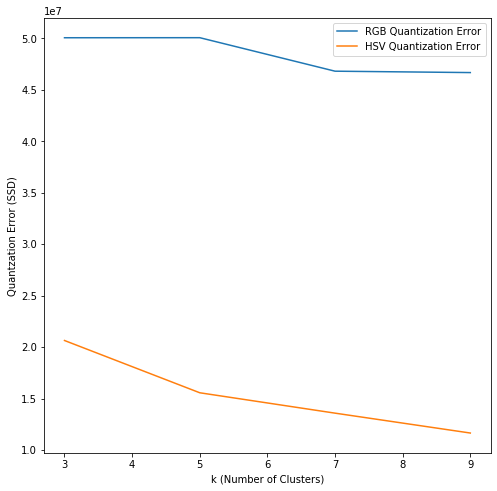

In [200]:
plt.figure(figsize=(8,8))
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Quantzation Error (SSD)')
plt.plot([3, 5, 7, 9], errors['rgb'], label='RGB Quantization Error')
plt.plot([3, 5, 7, 9], errors['hsv'], label='HSV Quantization Error')
plt.legend()
plt.savefig('SSD vs. k.jpg')

In [53]:
# 2.1.c
quantized_rgb_error = computeQuantizationError(rgb_fish, segmented_rgb_fish)
quantized_hsv_error = computeQuantizationError(rgb_fish, segmented_hsv_fish)

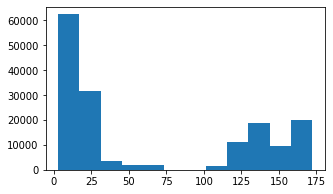

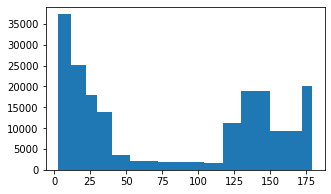

In [74]:
# 2.1.d
hist_eq, hist_cl = getHueHists(rgb_fish, 12, False)

In [75]:
hist_cl

(array([37266, 25122, 17926, 13792,  3572,  2016,  1891,  1681, 11271,
        18977,  9389, 20097]),
 array([  3,  12,  22,  30,  40,  53,  72, 104, 117, 130, 150, 172, 179]))

In [76]:
sum(hist_cl[0][4:8])

9160

In [88]:
hist_cl[1][4:8]

array([33, 40, 49, 57])

In [77]:
sum(hist_cl[0])

163000

In [78]:
sum(hist_cl[0][4:8]) / sum(hist_cl[0])

0.05619631901840491

In [33]:
im = rgb_fish.copy()
k = 5

In [34]:
w, h, c = im.shape
hsv_im = rgb2hsv(im)
segmented_hue, meanHues = quantizeRGB(hsv_im[:, :, 0].reshape(-1, 1), k)
segmented_hsv_im = hsv_im.copy()
segmented_hsv_im[:, :, 0] = segmented_hue.reshape(w, h)

histEqual = np.histogram(segmented_hue, k)
histClustered = np.histogram(segmented_hue, sorted(meanHues.reshape(-1)))

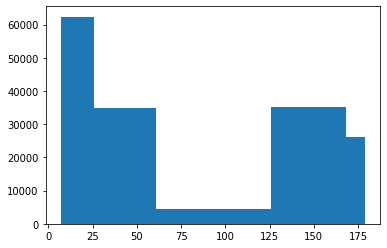

In [48]:
a = plt.hist(segmented_hue, np.concatenate([sorted(meanHues.reshape(-1)), [179]]).astype(int))

In [46]:
plt.hist??

(7.270949541578509, 168.61981294140102)

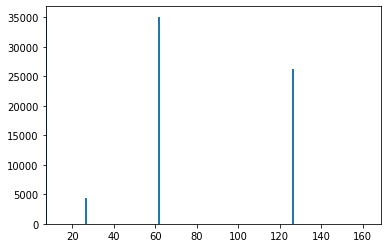

In [39]:
plt.bar(hist_cl[1][:-1], hist_cl[0])
plt.xlim(min(hist_cl[1]), max(hist_cl[1]))

In [36]:
meanHues

array([[ 26.85072958],
       [126.37180291],
       [  7.27094954],
       [168.61981294],
       [ 61.72807414]])

In [37]:
histClustered

(array([34883,  4424, 35110, 26195]),
 array([  7.27094954,  26.85072958,  61.72807414, 126.37180291,
        168.61981294]))

(array([0., 0., 0., 0., 0.]),
 array([  7,  26,  61, 126, 168, 179]),
 <a list of 5 Patch objects>)

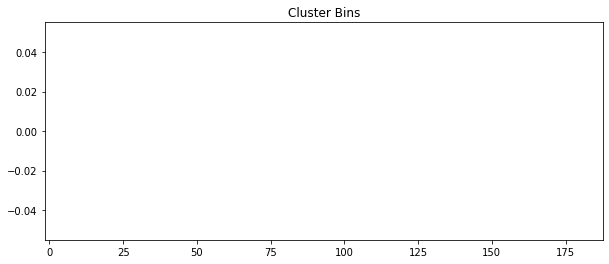

In [32]:
fig = plt.figure(figsize=(10,4))
#fig.suptitle('k={}'.format(k))

ax2 = fig.add_subplot(111, title='Cluster Bins')#, xticks=[], yticks=[])
plt.subplot(ax2)
bins = np.concatenate([sorted(hist_cl[1].reshape(-1)), [179]]).astype(int)
ax2.hist(hist_cl[0], bins)

(array([0., 0., 0., 0., 0.]),
 array([  7,  26,  61, 126, 168, 179]),
 <a list of 5 Patch objects>)

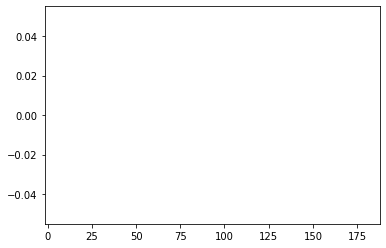

In [29]:
bins = np.concatenate([sorted(hist_cl[1].reshape(-1)), [179]]).astype(int)
plt.hist(hist_cl[0], bins)

In [26]:
hist_cl[0]

array([34883,  4424, 35110, 26195])

In [5]:
np.arange()

In [239]:
70045, 941

(70045, 941)

In [240]:
4556, 4556

(4556, 4556)

In [28]:
show(im)

In [241]:
#im = load_image('egg.jpg')
im = load_image('jupiter.jpg')

In [316]:
#rs = [13, 32, 50, 110]
#rs = [3, 4, 5, 6]
rs = [13]
min_val = 300
max_val = 500
thetaBinSize = 0.05
centerBinSize = 1
useGradient = False
top_c = 20
top_a = 10

In [317]:
centers = []
output = im.copy()

for r in rs:
    
    H, tracker = detectCircles(im, r, useGradient, thetaBinSize, centerBinSize, min_val, max_val)
    sorted_H = sorted(H.items(), key=operator.itemgetter(1))
    max_votes = sorted_H[-1][1]
    centers += [c[0] for c in sorted_H if c[1]>=max_votes-top_c]    
    
for a, b, r, in centers:
    cv2.circle(output, (a, b), r, (0, 255, 0), 4)   
cv2.imshow("output", np.hstack([output, im]))
cv2.imwrite('r={}_grad={}_binsize={}_{}'.format(r, useGradient, centerBinSize, 'jupiter.jpg'), output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [318]:
sorted_H[-15:]

[((374, 451, 13), 39),
 ((394, 428, 13), 40),
 ((387, 446, 13), 40),
 ((407, 447, 13), 40),
 ((457, 473, 13), 40),
 ((73, 234, 13), 41),
 ((398, 425, 13), 41),
 ((394, 430, 13), 42),
 ((397, 425, 13), 43),
 ((400, 448, 13), 43),
 ((455, 477, 13), 43),
 ((396, 426, 13), 44),
 ((73, 235, 13), 48),
 ((74, 234, 13), 50),
 ((74, 235, 13), 59)]

In [290]:
x = [np.array([x, y]) for (x, y, r), ct in sorted_H if ct >= max_votes-top_c]
elbow_method(np.array(x), range(2, 25))

KeyboardInterrupt: 

In [286]:
centers = []
output = im.copy()
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(x)
centers = [(int(a), int(b), r) for a, b in kmeans.cluster_centers_]
for a, b, r, in centers:
    cv2.circle(output, (a, b), r, (0, 255, 0), 4)  
cv2.imshow("output", np.hstack([output, im]))
#cv2.imwrite('r={}_grad={}_clusters={}_{}'.format(r, useGradient, n_clusters, 'jupiter.jpg'), output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [200]:
for a, b in kmeans.cluster_centers_:
    print(a, b)

428.25 429.75
220.28571428571428 321.57142857142856
389.42857142857144 468.42857142857144
352.2 498.2
417.2352941176471 452.4117647058824
392.0 402.6666666666667


In [ ]:
kmeans.cluster_centers_

In [180]:
x = [np.array([x, y]) for (x, y, r), ct in sorted_H[-50:]]

In [170]:
dists = {(x, y): 0 for (x, y, r), ct in c}

In [171]:
sorted_H[i]

((284, 12, 32), 1)

In [172]:
for i in range(len(c)-1):
    x1, y1, _ = c[i][0]
    a = np.array([x1, y1])
    dist = 0
    for j in range(i+1, len(c)):
        x2, y2, _ = c[j][0]
        b = np.array([x2, y2])
        dist = euclidean_distance(a, b)
        dists[(x1, y1)] += dist
        dists[(x2, y2)] += dist

In [174]:
def elbow_method(x, K_range, distance='euclidean'):
    # k means determine k
    distortions = []
    for k in K_range:
        k_means = KMeans(n_clusters=k).fit(x)
        distortions.append(sum(np.min(cdist(x, k_means.cluster_centers_, distance), axis=1)) / x.shape[0])

    # Plot the elbow
    plt.figure(figsize=(10, 8))
    plt.plot(K_range, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    #plt.title('The Elbow Method showing the optimal k')
    plt.show()

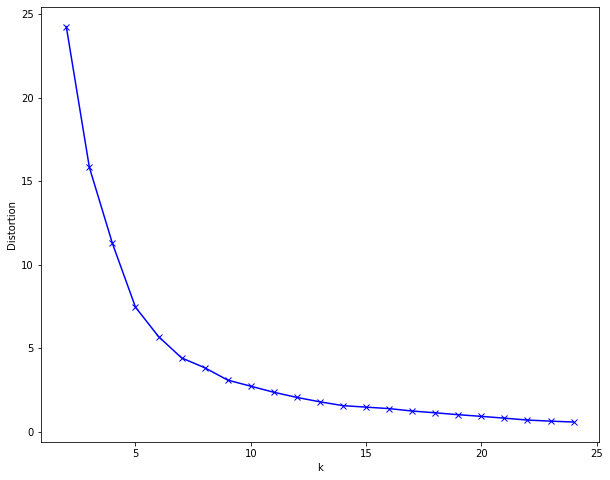

In [183]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [134]:
def euclidean_distance(a, b):
    return np.sum(np.sqrt(np.power(a - b, 2)))

In [191]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(x)

In [192]:
kmeans.cluster_centers_

array([[428.25      , 429.75      ],
       [220.28571429, 321.57142857],
       [389.42857143, 468.42857143],
       [352.2       , 498.2       ],
       [417.23529412, 452.41176471],
       [392.        , 402.66666667]])

In [198]:
kmeans.labels_

array([2, 2, 2, 2, 3, 3, 3, 1, 5, 0, 0, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 3,
       1, 0, 5, 0, 4, 4, 2, 2, 3, 1, 5, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4,
       4, 1, 4, 1, 1, 1], dtype=int32)

In [135]:
x, y, _ = sorted_H[-1][0]
a = np.array([x, y])
a

array([219, 321])

In [136]:
x, y, _ = sorted_H[-2][0]
b = np.array([x, y])
b

array([220, 321])

In [137]:
euclidean_distance(a, b)

1.0

In [139]:
from scipy.spatial import distance
distance.euclidean(a, b)

1.0

In [80]:
acc_output = np.zeros(im.shape)

In [86]:
top_H = [center for center, count in sorted_H if count>=max_votes-top_a]

In [87]:
for a, b, r, in top_H:
    cv2.circle(acc_output, (a, b), r, (255, 255, 255), 2)  
cv2.imshow("accumulator output", acc_output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [43]:
show(acc_output)

In [57]:
top_a

17

In [184]:
ax??

In [30]:
ax = plt.gca()
ax.cla()
ax.set_xlim((0, im.shape[1]))
ax.set_ylim((0, im.shape[0]))

for cir, _ in sorted_H[-100:]:
    
    a, b, r = cir
    circle = plt.Circle((a, im.shape[0]-b), r, fill=False)
    ax.add_artist(circle)

AttributeError: 'AxesSubplot' object has no property 'figsize'

<Figure size 432x288 with 0 Axes>

In [ ]:
circle1 = plt.Circle((0, 0), 2, color='r')
# now make a circle with no fill, which is good for hi-lighting key results
circle2 = plt.Circle((5, 5), 0.5, color='b', fill=False)
circle3 = plt.Circle((10, 10), 2, color='g', clip_on=False)

ax = plt.gca()
ax.cla() # clear things for fresh plot

# change default range so that new circles will work
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))
# some data
ax.plot(range(11), 'o', color='black')
# key data point that we are encircling
ax.plot((5), (5), 'o', color='y')

ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
fig.savefig('plotcircles2.png')

In [55]:
gray_im = rgb2gray(im)
canny_edges = cv2.Canny(gray_im, min_val, max_val)
show(canny_edges)

In [46]:
max_votes = sorted_H[-1][1]

In [52]:
centers += [c[0] for c in sorted_H if c[1]>=max_votes-3]

In [53]:
centers

[(60, 92, 7),
 (130, 174, 8),
 (128, 158, 9),
 (146, 160, 10),
 (122, 158, 11),
 (122, 156, 12),
 (130, 152, 12),
 (148, 162, 12),
 (146, 164, 12),
 (124, 160, 12),
 (134, 176, 12),
 (128, 180, 12),
 (114, 162, 12),
 (124, 182, 12),
 (128, 154, 12),
 (126, 158, 12),
 (120, 158, 12),
 (116, 160, 12),
 (124, 154, 12),
 (128, 150, 12),
 (126, 152, 12),
 (122, 156, 12)]

In [47]:
circles = [c[0] for c in sorted_H if c[1]>=max_votes-3]

[(130, 152, 12),
 (148, 162, 12),
 (146, 164, 12),
 (124, 160, 12),
 (134, 176, 12),
 (128, 180, 12),
 (114, 162, 12),
 (124, 182, 12),
 (128, 154, 12),
 (126, 158, 12),
 (120, 158, 12),
 (116, 160, 12),
 (124, 154, 12),
 (128, 150, 12),
 (126, 152, 12),
 (122, 156, 12)]

In [49]:
sorted_H[-20:]

[((130, 178, 12), 15),
 ((120, 184, 12), 15),
 ((110, 164, 12), 15),
 ((106, 166, 12), 15),
 ((130, 152, 12), 16),
 ((148, 162, 12), 16),
 ((146, 164, 12), 16),
 ((124, 160, 12), 16),
 ((134, 176, 12), 16),
 ((128, 180, 12), 16),
 ((114, 162, 12), 16),
 ((124, 182, 12), 16),
 ((128, 154, 12), 17),
 ((126, 158, 12), 17),
 ((120, 158, 12), 17),
 ((116, 160, 12), 17),
 ((124, 154, 12), 18),
 ((128, 150, 12), 19),
 ((126, 152, 12), 19),
 ((122, 156, 12), 19)]

In [231]:
H, tracker = detectCircles(jupiter, r, False)

In [232]:
sorted_H = sorted(H.items(), key=operator.itemgetter(1))
sorted_H[-50:]

[((138, 90, 110), 21),
 ((-21, 147, 110), 21),
 ((66, 213, 110), 21),
 ((-3, 168, 110), 21),
 ((-24, 171, 110), 21),
 ((-15, 171, 110), 21),
 ((90, 222, 110), 21),
 ((126, 114, 110), 21),
 ((3, 117, 110), 21),
 ((186, 231, 110), 21),
 ((180, 246, 110), 21),
 ((105, 270, 110), 21),
 ((153, 108, 110), 21),
 ((201, 144, 110), 22),
 ((69, 57, 110), 22),
 ((123, 132, 110), 22),
 ((180, 108, 110), 22),
 ((174, 111, 110), 22),
 ((183, 111, 110), 22),
 ((-12, 147, 110), 22),
 ((186, 114, 110), 22),
 ((87, 51, 110), 23),
 ((174, 162, 110), 23),
 ((126, 120, 110), 23),
 ((177, 108, 110), 23),
 ((186, 111, 110), 23),
 ((156, 96, 110), 23),
 ((135, 258, 110), 23),
 ((153, 105, 110), 23),
 ((201, 153, 110), 24),
 ((141, 105, 110), 24),
 ((-39, 138, 110), 24),
 ((48, 216, 110), 24),
 ((-9, 186, 110), 24),
 ((129, 117, 110), 24),
 ((-15, 204, 110), 24),
 ((81, 63, 110), 25),
 ((-15, 186, 110), 25),
 ((126, 117, 110), 25),
 ((90, 63, 110), 26),
 ((162, 105, 110), 26),
 ((-12, 186, 110), 27),
 ((162, 2

In [233]:
idx = -1

In [234]:
sorted_H[idx][0]

(123, 126, 110)

In [235]:
tracker[sorted_H[idx][0]]

[(187, 37),
 (187, 38),
 (188, 38),
 (189, 38),
 (200, 47),
 (200, 48),
 (201, 48),
 (201, 49),
 (202, 49),
 (211, 60),
 (212, 60),
 (212, 61),
 (213, 61),
 (213, 62),
 (222, 75),
 (222, 76),
 (229, 91),
 (232, 108),
 (232, 108),
 (232, 109),
 (232, 109),
 (232, 110),
 (232, 110),
 (232, 142),
 (232, 143),
 (232, 144),
 (220, 175),
 (221, 175),
 (213, 191),
 (213, 192),
 (202, 203),
 (46, 204),
 (201, 204),
 (202, 204),
 (44, 205),
 (45, 205),
 (200, 205),
 (201, 205)]

In [236]:
a, b, r = sorted_H[idx][0]

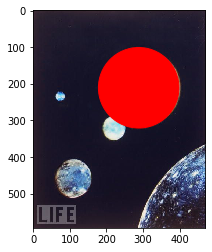

In [237]:
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(jupiter)

circle = plt.Circle((165+a, 85+b), r, color='red')
ax.add_patch(circle)

In [216]:
circle = plt.Circle((a, b), r) 

In [37]:
output = jupiter.copy()
circles = cv2.HoughCircles(jupiter_gray, cv2.HOUGH_GRADIENT, 1.1, 150)
 
# ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")

    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        #cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

    # show the output image
    cv2.imshow("output", np.hstack([jupiter, output]))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

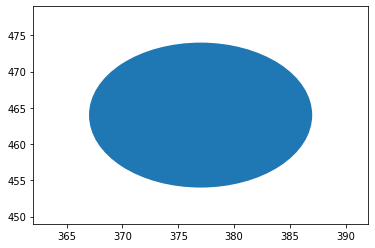

In [173]:
ax = plt.gca()
ax.cla() # clear things for fresh plot

# change default range so that new circles will work
ax.set_xlim((a-15, a+15))
ax.set_ylim((b-15, b+15))

ax.add_artist(circle)

In [133]:
dy[y, x], dx[y, x]

(0, 0)

In [134]:
theta

nan

[((308, 9, 10), 1),
 ((309, -6, 10), 1),
 ((307, 10, 10), 1),
 ((311, -6, 10), 1),
 ((304, -1, 10), 1),
 ((306, 7, 10), 1),
 ((68, 25, 10), 1),
 ((70, 30, 10), 1),
 ((70, 25, 10), 1),
 ((72, 34, 10), 1),
 ((70, 26, 10), 1),
 ((387, 33, 10), 1),
 ((391, 35, 10), 1),
 ((393, 16, 10), 1),
 ((389, 19, 10), 1),
 ((75, 17, 10), 1),
 ((76, 17, 10), 1),
 ((70, 27, 10), 1),
 ((384, 30, 10), 1),
 ((389, 20, 10), 1),
 ((391, 18, 10), 1),
 ((388, 20, 10), 1),
 ((392, 18, 10), 1),
 ((388, 32, 10), 1),
 ((91, 48, 10), 1),
 ((95, 51, 10), 1),
 ((92, 42, 10), 1),
 ((92, 50, 10), 1),
 ((92, 39, 10), 1),
 ((93, 37, 10), 1),
 ((97, 35, 10), 1),
 ((92, 49, 10), 1),
 ((338, 111, 10), 1),
 ((344, 110, 10), 1),
 ((343, 110, 10), 1),
 ((346, 110, 10), 1),
 ((341, 114, 10), 1),
 ((304, 111, 10), 1),
 ((304, 130, 10), 1),
 ((303, 130, 10), 1),
 ((307, 111, 10), 1),
 ((306, 111, 10), 1),
 ((309, 130, 10), 1),
 ((346, 111, 10), 1),
 ((346, 112, 10), 1),
 ((300, 131, 10), 1),
 ((299, 128, 10), 1),
 ((304, 115, 10)

In [74]:
theta = math.atan(dy[y, x] / dx[y, x])

In [97]:
a = np.round(x - r * math.cos(theta), 3)
b = np.round(y + r * math.sin(theta), 3)
a, b

(308.146, 9.282)

In [80]:
H[(a, b)] = 1

In [83]:
H.get((a, b))

1

In [1]:
e = [[], []]

In [2]:
e[0].append(1)

In [3]:
e[1].append(2)

In [4]:
e

[[1], [2]]

In [5]:
hsv_fish = rgb2hsv(rgb_fish)

In [7]:
np.max(hsv_fish[:, :, 0])

179

In [13]:
a = 'fish.jpg'

In [14]:
b = 'k={}_segmented_rgb_{}'.format(3, a)

In [15]:
b

'k=3_segmented_rgb_fish.jpg'